# Regression Project of Hospitality Domain

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Importing Data

In [2]:
df = pd.read_csv("Air_BNB.csv")

C:\Users\anshu\AppData\Local\Temp\ipykernel_13076\1119835410.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("F:\Data_Analytics\Datasets\Air_BNB.csv")


In [3]:
df

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


In [4]:
df.drop('id', axis=1, inplace=True)

In [5]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [6]:
df.tail()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
74106,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000
74110,Entire home/apt,4.0,1.0,moderate,False,f,96.0,1.0,2.0,4.852030


In [7]:
df.shape

(74111, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [9]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


In [10]:
round(df.describe(include='all'),2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108.0,NaN,NaN,NaN,3.16,2.15,1.0,2.0,2.0,4.0,16.0
bathrooms,73908.0,NaN,NaN,NaN,1.24,0.58,0.0,1.0,1.0,1.0,8.0
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107,2,True,54399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389.0,NaN,NaN,NaN,94.07,7.84,20.0,92.0,96.0,100.0,100.0
bedrooms,74019.0,NaN,NaN,NaN,1.27,0.85,0.0,1.0,1.0,1.0,10.0
beds,73980.0,NaN,NaN,NaN,1.71,1.25,0.0,1.0,1.0,2.0,18.0
log_price,74111.0,NaN,NaN,NaN,4.78,0.72,0.0,4.32,4.71,5.22,7.6


In [11]:
df['room_type'].nunique()

3

In [12]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(), ':', df['room_type'].nunique())
        print(df[column].value_counts())
        print()

ROOM_TYPE : 3
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: room_type, dtype: int64

CANCELLATION_POLICY : 3
strict      32500
flexible    22543
moderate    19060
Name: cancellation_policy, dtype: int64

CLEANING_FEE : 3
True     54399
False    19708
Name: cleaning_fee, dtype: int64

INSTANT_BOOKABLE : 3
f    54660
t    19451
Name: instant_bookable, dtype: int64



In [13]:
df.columns

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [14]:
df_2=df.copy()

In [15]:
df_2.drop_duplicates(inplace=True)

In [16]:
df_2

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74104,Entire home/apt,2.0,1.0,strict,True,f,100.0,1.0,1.0,4.356709
74107,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


In [17]:
df_2.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 195
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    10215
bedrooms                   92
beds                      125
log_price                   0
dtype: int64

In [18]:
df_2

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74104,Entire home/apt,2.0,1.0,strict,True,f,100.0,1.0,1.0,4.356709
74107,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


In [19]:
df_2 = pd.get_dummies(df_2, columns = ['room_type', 'cancellation_policy','instant_bookable'],drop_first = True)

In [20]:
df_2.isnull().sum()

accommodates                        3
bathrooms                         195
cleaning_fee                        4
review_scores_rating            10215
bedrooms                           92
beds                              125
log_price                           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_moderate        0
cancellation_policy_strict          0
instant_bookable_t                  0
dtype: int64

## Null Value Treatment

In [21]:
for column in df_2.columns:
    if df_2[column].dtype != 'object':
        mean = df_2[column].mean()
        df_2[column] = df_2[column].fillna(mean)

In [22]:
df_mean = df_2

In [23]:
df_mean

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,True,100.000000,1.0,1.0,5.010635,0,0,0,1,0
1,7.0,1.0,True,93.000000,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,True,92.000000,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,True,93.202041,2.0,2.0,6.620073,0,0,0,0,0
4,2.0,1.0,True,40.000000,0.0,1.0,4.744932,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,True,100.000000,1.0,1.0,4.356709,0,0,0,1,0
74107,4.0,2.0,True,93.000000,2.0,4.0,5.043425,0,0,1,0,0
74108,5.0,1.0,True,94.000000,2.0,2.0,5.220356,0,0,1,0,1
74109,2.0,1.0,True,93.202041,0.0,2.0,5.273000,0,0,0,1,1


In [24]:
df_2 = df_2.rename(columns={'room_type_Private room': 'room_type_Private_room', 'room_type_Shared room': 'room_type_Shared_room'})

In [25]:
df_mean.dropna(inplace=True)

In [26]:
df_mean.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

In [27]:
df_med = df_2.copy()

In [28]:
for column in df_med.columns:
    if df_med[column].dtype != 'object':
        median = df_med[column].median()
        df_med[column] = df_med[column].fillna(median)

In [29]:
df_med

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private_room,room_type_Shared_room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,True,100.000000,1.0,1.0,5.010635,0,0,0,1,0
1,7.0,1.0,True,93.000000,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,True,92.000000,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,True,93.202041,2.0,2.0,6.620073,0,0,0,0,0
4,2.0,1.0,True,40.000000,0.0,1.0,4.744932,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,True,100.000000,1.0,1.0,4.356709,0,0,0,1,0
74107,4.0,2.0,True,93.000000,2.0,4.0,5.043425,0,0,1,0,0
74108,5.0,1.0,True,94.000000,2.0,2.0,5.220356,0,0,1,0,1
74109,2.0,1.0,True,93.202041,0.0,2.0,5.273000,0,0,0,1,1


In [30]:
df_med.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    4
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private_room          0
room_type_Shared_room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

In [31]:
df_med = df_med.dropna()

In [32]:
df_med

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private_room,room_type_Shared_room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,True,100.000000,1.0,1.0,5.010635,0,0,0,1,0
1,7.0,1.0,True,93.000000,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,True,92.000000,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,True,93.202041,2.0,2.0,6.620073,0,0,0,0,0
4,2.0,1.0,True,40.000000,0.0,1.0,4.744932,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,True,100.000000,1.0,1.0,4.356709,0,0,0,1,0
74107,4.0,2.0,True,93.000000,2.0,4.0,5.043425,0,0,1,0,0
74108,5.0,1.0,True,94.000000,2.0,2.0,5.220356,0,0,1,0,1
74109,2.0,1.0,True,93.202041,0.0,2.0,5.273000,0,0,0,1,1


In [33]:
df_med.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private_room          0
room_type_Shared_room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

In [34]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_2)
df_knn = pd.DataFrame(data = df_imputed, columns = df_2.columns)

In [35]:
df_knn

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private_room,room_type_Shared_room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,0.0,0.0,0.0,1.0,0.0
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,0.0,0.0,0.0,1.0,1.0
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,0.0,0.0,1.0,0.0,1.0
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
54112,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,0.0,0.0,0.0,1.0,0.0
54113,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,0.0,0.0,1.0,0.0,0.0
54114,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,0.0,0.0,1.0,0.0,1.0
54115,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,0.0,0.0,0.0,1.0,1.0


## Outlier Treatment

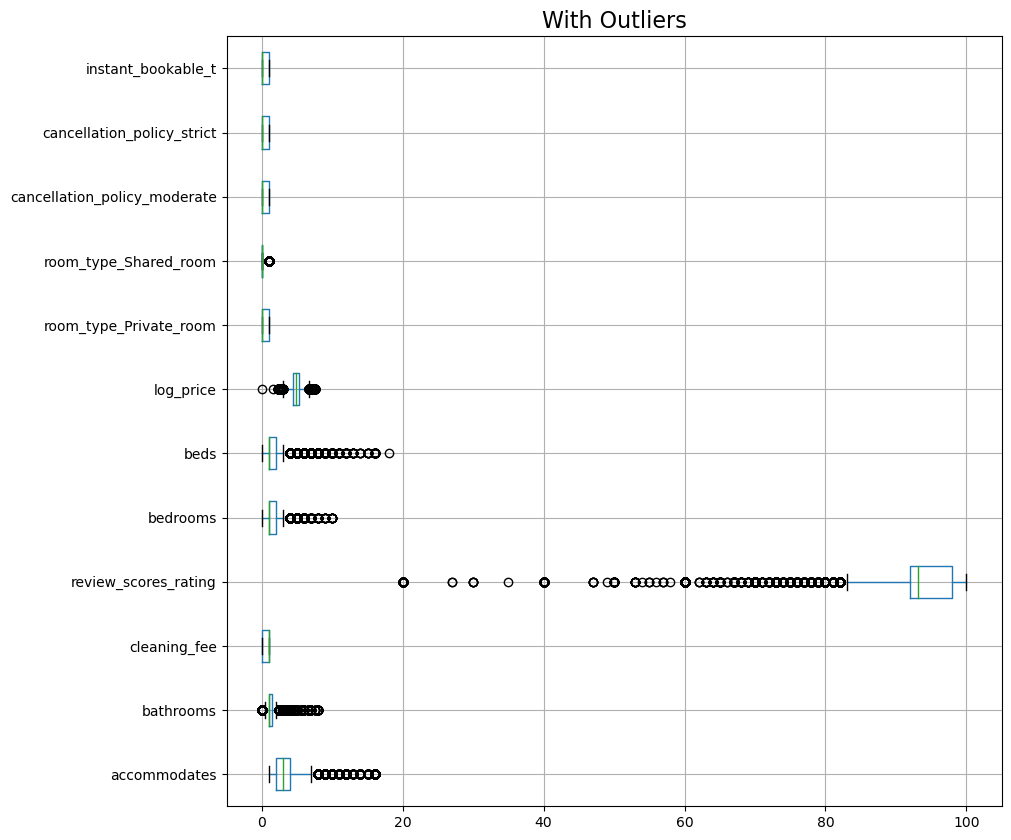

In [36]:
cont = df_knn.dtypes[(df_knn.dtypes!='uint8') & df_knn.dtypes!='bool'].index
plt.figure(figsize=(10,10))
df_knn[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [37]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [38]:
remove_outlier(df_mean['review_scores_rating'])

(83.0, 107.0)

In [39]:
df_mean_out = df_mean.copy()
df_med_out = df_med.copy()
df_knn_out = df_knn.copy()

In [40]:
for column in df_mean_out.columns:
    lr,ur = remove_outlier(df_mean_out[column])
    df_mean_out[column] = np.where(df_mean_out[column]>ur,ur,df_mean_out[column])
    df_mean_out[column] = np.where(df_mean_out[column]<lr,lr,df_mean_out[column])

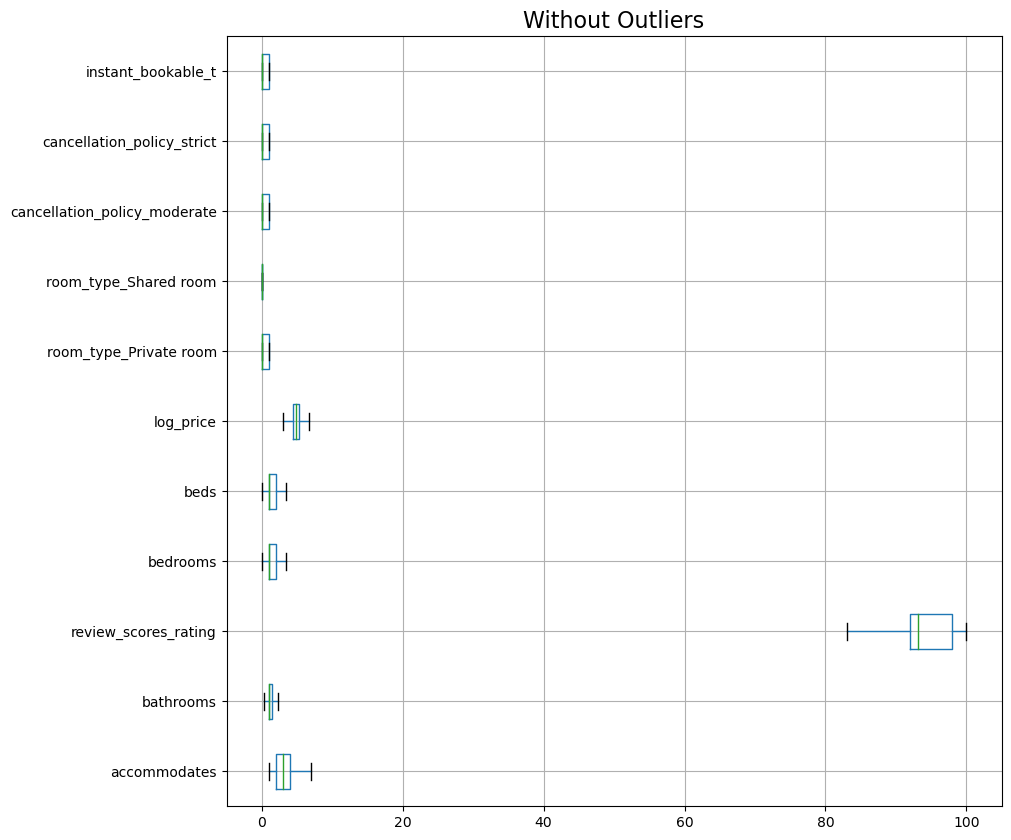

In [41]:
plt.figure(figsize=(10,10))
df_mean_out.boxplot(vert=0)
plt.title('Without Outliers', fontsize=16)
plt.show()

In [42]:
for column in df_med_out.columns:
    lr,ur = remove_outlier(df_med_out[column])
    df_med_out[column] = np.where(df_med_out[column]>ur,ur,df_med_out[column])
    df_med_out[column] = np.where(df_med_out[column]<lr,lr,df_med_out[column])

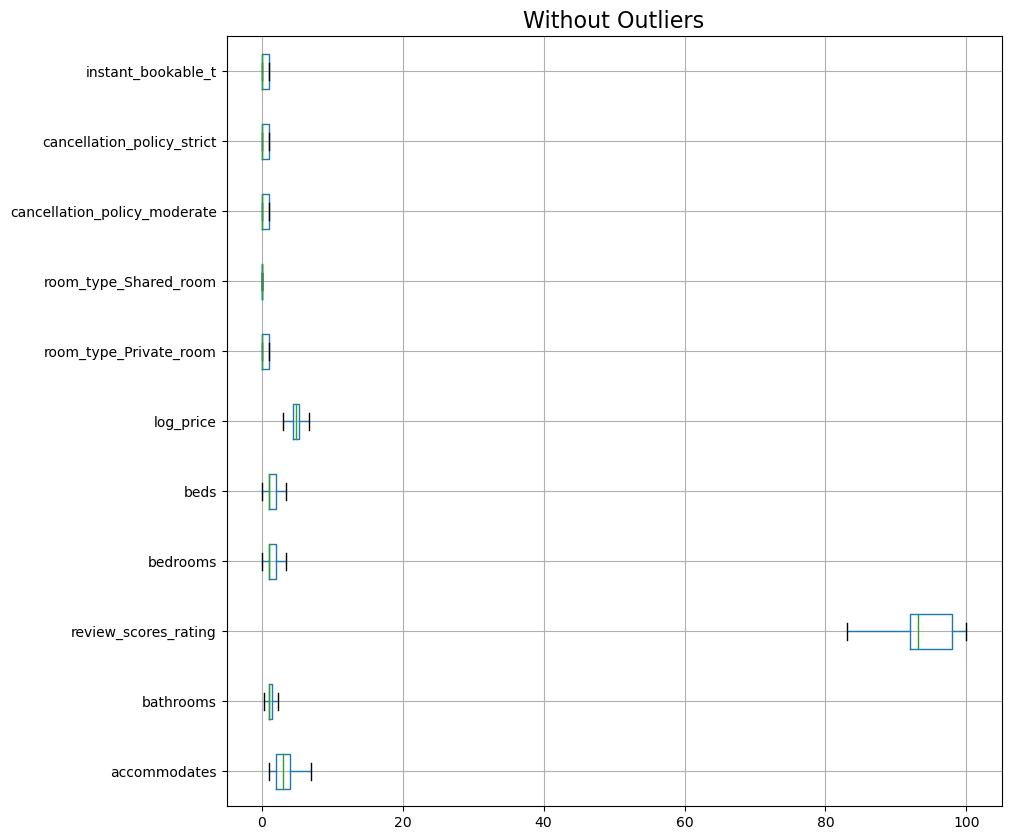

In [43]:
plt.figure(figsize=(10,10))
df_med_out.boxplot(vert=0)
plt.title('Without Outliers', fontsize=16)
plt.show()

In [44]:
for column in df_knn_out.columns:
    lr,ur = remove_outlier(df_knn_out[column])
    df_knn_out[column] = np.where(df_knn_out[column]>ur,ur,df_knn_out[column])
    df_knn_out[column] = np.where(df_knn_out[column]<lr,lr,df_knn_out[column])

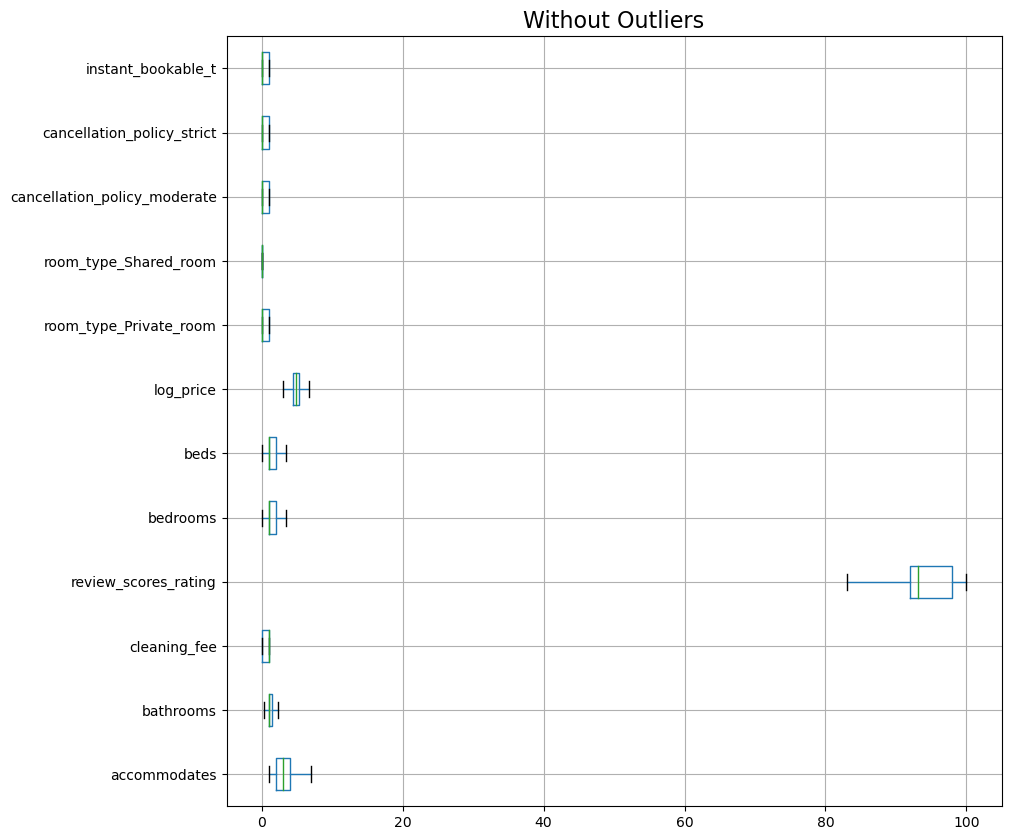

In [45]:
plt.figure(figsize=(10,10))
df_knn_out.boxplot(vert=0)
plt.title('Without Outliers', fontsize=16)
plt.show()

## Data Distribution

C:\Users\anshu\AppData\Local\Temp\ipykernel_13076\22042883.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_mean.corr(), annot=True)


<function matplotlib.pyplot.show(close=None, block=None)>

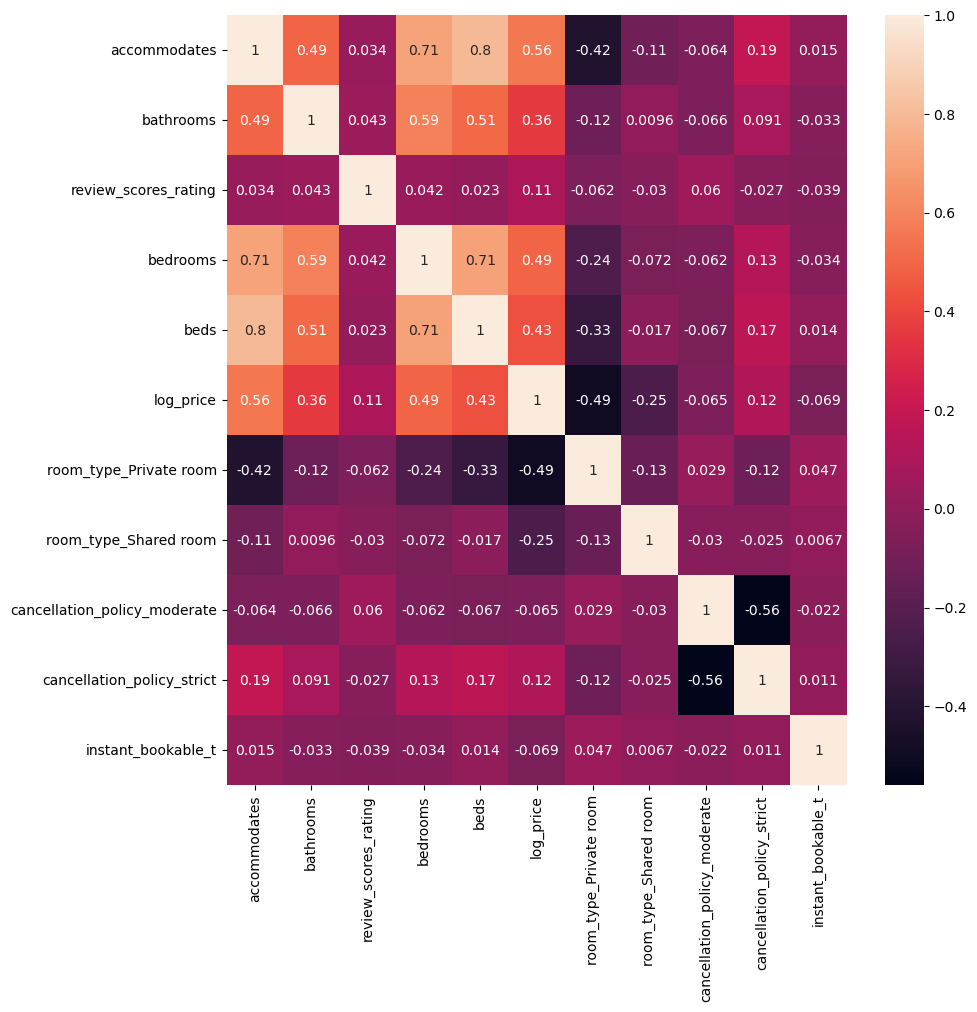

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(df_mean.corr(), annot=True)
plt.show

## Train-Test Split

In [47]:
X = df_mean_out.drop('log_price',axis=1)
#copy target into y dataframe.
y = df_mean_out[['log_price']]

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54113 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  54113 non-null  float64
 1   bathrooms                     54113 non-null  float64
 2   cleaning_fee                  54113 non-null  object 
 3   review_scores_rating          54113 non-null  float64
 4   bedrooms                      54113 non-null  float64
 5   beds                          54113 non-null  float64
 6   room_type_Private room        54113 non-null  float64
 7   room_type_Shared room         54113 non-null  float64
 8   cancellation_policy_moderate  54113 non-null  float64
 9   cancellation_policy_strict    54113 non-null  float64
 10  instant_bookable_t            54113 non-null  float64
dtypes: float64(10), object(1)
memory usage: 5.0+ MB


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Linear Regression Model

In [50]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [51]:
regression_model.score(X_train,y_train)

0.44286242074779814

## Mean - Outlier not treated

In [52]:
X = df_mean.drop('log_price',axis=1)
#copy target into y dataframe.
y = df_mean[['log_price']]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [54]:
regression_model.fit(X_train,y_train)

LinearRegression()

In [55]:
regression_model.score(X_train,y_train)

0.5054020504556889

## Med - Outlier Treated

In [56]:
X = df_med_out.drop('log_price',axis=1)
#copy target into y dataframe.
y = df_med_out[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

regression_model.fit(X_train,y_train)

regression_model.score(X_train,y_train)

0.44286242074779814

## Med - Outlier not Treated

In [57]:
X = df_med.drop('log_price',axis=1)
#copy target into y dataframe.
y = df_med[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

regression_model.fit(X_train,y_train)

regression_model.score(X_train,y_train)

0.5054020504556889

## KNN - Outlier Treated

In [58]:
X = df_knn_out.drop('log_price',axis=1)
#copy target into y dataframe.
y = df_knn_out[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

regression_model.fit(X_train,y_train)

regression_model.score(X_train,y_train)

0.4453404989914611

## KNN - Outlier not Treated

In [59]:
X = df_knn.drop('log_price',axis=1)
#copy target into y dataframe.
y = df_knn[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

regression_model.fit(X_train,y_train)

regression_model.score(X_train,y_train)

0.5026451320536797

In [60]:
df_2

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private_room,room_type_Shared_room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,True,100.000000,1.0,1.0,5.010635,0,0,0,1,0
1,7.0,1.0,True,93.000000,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,True,92.000000,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,True,93.202041,2.0,2.0,6.620073,0,0,0,0,0
4,2.0,1.0,True,40.000000,0.0,1.0,4.744932,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,True,100.000000,1.0,1.0,4.356709,0,0,0,1,0
74107,4.0,2.0,True,93.000000,2.0,4.0,5.043425,0,0,1,0,0
74108,5.0,1.0,True,94.000000,2.0,2.0,5.220356,0,0,1,0,1
74109,2.0,1.0,True,93.202041,0.0,2.0,5.273000,0,0,0,1,1


In [61]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)
data_train.head()

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,room_type_Private_room,room_type_Shared_room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t,log_price
25136,7.0,1.0,0.0,100.000000,1.0,3.0,0.0,0.0,0.0,0.0,0.0,4.709530
6288,1.0,2.0,0.0,99.000000,1.0,1.0,1.0,0.0,0.0,1.0,1.0,3.806662
36561,2.0,1.0,0.0,80.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.844187
2034,16.0,1.0,1.0,100.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.396930
21668,3.0,1.0,0.0,93.202041,1.0,1.0,0.0,1.0,0.0,1.0,1.0,4.499810


In [64]:
expr= 'log_price ~ accommodates + bathrooms + instant_bookable_t+review_scores_rating + bedrooms + beds + room_type_Private_room + room_type_Shared_room  + cancellation_policy_moderate + cancellation_policy_strict + cleaning_fee'

In [65]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula=expr, data = data_train).fit()
lm1.params

Intercept                       4.089029
accommodates                    0.074629
bathrooms                       0.156194
instant_bookable_t             -0.057925
review_scores_rating            0.006029
bedrooms                        0.154616
beds                           -0.050251
room_type_Private_room         -0.649055
room_type_Shared_room          -1.102317
cancellation_policy_moderate   -0.066478
cancellation_policy_strict     -0.014291
cleaning_fee                   -0.090393
dtype: float64

In [66]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for accommodates is 0.07462901005227182
The coefficient for bathrooms is 0.15619425793512862
The coefficient for cleaning_fee is -0.090392707223941
The coefficient for review_scores_rating is 0.006028805000826719
The coefficient for bedrooms is 0.1546164022553429
The coefficient for beds is -0.050251029049161705
The coefficient for room_type_Private_room is -0.6490552407625466
The coefficient for room_type_Shared_room is -1.1023174711065207
The coefficient for cancellation_policy_moderate is -0.0664780003224117
The coefficient for cancellation_policy_strict is -0.014290958834706807
The coefficient for instant_bookable_t is -0.05792513336497068


In [67]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4.089029361513784
